In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Inspect the engine
inspector = inspect(engine)

In [10]:
# Check the columns for measurement table
inspector.get_columns('Measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Precipitation Analysis

In [11]:
# Read SQL and save in measurement dataframe
measurement_df = pd.read_sql('select * from measurement', engine.connect())
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
# Read SQL and save in station dataframe
station_df = pd.read_sql('select * from station', engine.connect())
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [13]:
# Find the most recent date in the data set
recent_date = session.query(Measurement.date).\
     order_by((Measurement.date).desc()).first()
    
recent_date

('2017-08-23',)

#### Most recent date:     August 23, 2017  (2017-08-23)

In [14]:
# Check the measuremengt dataframe data types
measurement_df.dtypes

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [15]:
# Find the most recent date in the data set (dataframe)
recent_date_df = measurement_df['date'].astype('datetime64')
recent_date_df.max()

Timestamp('2017-08-23 00:00:00')

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database (August 23, 2017). 
# Calculate the date one year from the last date in data set (August 23, 2016).
# Perform a query to retrieve the data and precipitation scores

prcp_query = session.query(Measurement.date, Measurement.prcp).\
    filter((Measurement.date >= dt.datetime(2016, 8, 22))).\
    order_by((Measurement.date).desc()).all()
prcp_query 

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [17]:
# Save the query results as a Pandas dataframe and set the index to the date column
prcp = pd.DataFrame(prcp_query, columns=['date','prcp'])
prcp_df = prcp.rename(columns={"prcp" : "precipitation"})
prcp_df.head()

,date,precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [18]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date", ascending = True)
prcp_df.head()

,date,precipitation
2229,2016-08-23,0.70
2223,2016-08-23,0.00
2224,2016-08-23,0.15
2228,2016-08-23,1.79
2226,2016-08-23,NaN


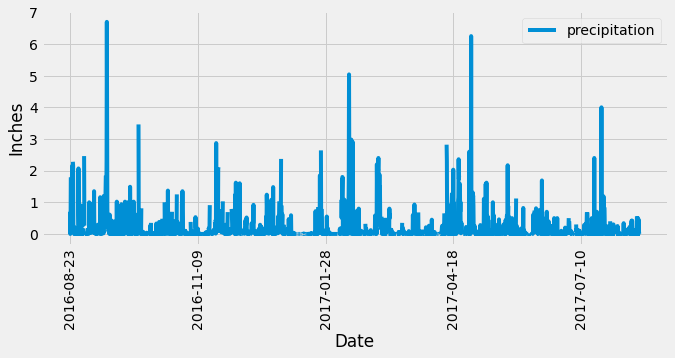

In [19]:
# Use Pandas plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='precipitation', rot=90, figsize=(10,4))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper right')
plt.savefig("Images/precipitation.png")
plt.show()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).group_by(Station.station).count()
print(station_count)

9


In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
station_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
print(station_active)

('USC00519281', 2772)


#### Most active station:     USC00519281  (2,772 counts)

In [23]:
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(f'USC00519281 Lowest Temperature: {lowest_temp}')
print(f'USC00519281 Highest Temperature: {highest_temp}')
print(f'USC00519281 Average Temperature: {avg_temp}')


USC00519281 Lowest Temperature: [(54.0,)]
USC00519281 Highest Temperature: [(85.0,)]
USC00519281 Average Temperature: [(71.66378066378067,)]


#### Most active station's lowest temp (tobs):    54 
#### Most active station's highest temp (tobs):    85
#### Most active station's average temp (tobs):    71.66 

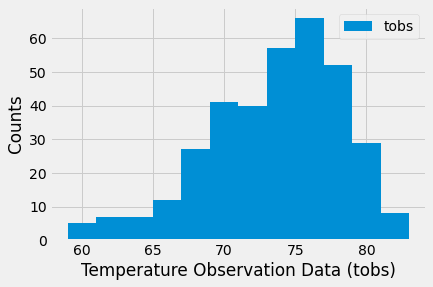

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_query = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter((Measurement.date >= dt.datetime(2016, 8, 23))).all()

active_station_df = pd.DataFrame(active_station_query, columns=['date','tobs'])
tobs = active_station_df['tobs']
plt.hist(tobs, bins=12, label="tobs")
plt.xlabel('Temperature Observation Data (tobs)')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.savefig("Images/station-histogram.png")
plt.show()


# Close session

In [26]:
# Close Session
session.close()